In [1]:
import mysql.connector
import pandas as pd
from pyspark.sql import SparkSession

In [3]:
appName = "PySpark"
master = "local"
# fixing error while conv from df to rdd
import findspark
findspark.init()
spark = SparkSession.builder.master(master).appName(appName).getOrCreate()

In [4]:
conn = mysql.connector.connect(user='root', database='safaricom',
                               password='',
                               host="localhost",
                               port=3306)

In [5]:
cursor = conn.cursor()
query = "SELECT * FROM employee"

In [6]:
# Create a pandas dataframe
pdf = pd.read_sql(query, con=conn)
conn.close()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
#get general info about the data frame
pdf.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12 non-null     int64  
 1   employee_name  12 non-null     object 
 2   department     12 non-null     object 
 3   state          12 non-null     object 
 4   salary         12 non-null     float64
 5   age            12 non-null     int64  
 6   bonus          12 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 800.0+ bytes


In [8]:
#get the first values of the dataframe
pdf.head

<bound method NDFrame.head of     id employee_name department      state   salary  age    bonus
0    1          Abel      Sales  Deri Dawa  90000.0   34  10000.0
1    2        Mesfin      Sales  Deri Dawa  86000.0   56  20000.0
2    3        Tesfaw      Sales     Gonder  81000.0   30  23000.0
3    4       Iwunete    Finance     Jijiga  90000.0   49  23000.0
4    5        Kefale    Finance     Gonder  99000.0   40  24000.0
5    6         Palit    Finance  Deri Dawa  83000.0   36  19000.0
6    7        kabede    Finance     Gonder  79000.0   53  15000.0
7    8       Ashebir  Marketing     Jijiga  80000.0   65  18000.0
8    9       Melkamu  Marketing     Gonder  91000.0   50  21000.0
9   10     Bethelhem      Sales      Adama   4000.0   26  14000.0
10  11       Gessese    Finance  Deri Dawa   7000.0   43  12000.0
11  12         Melat      Sales      Adama  78000.0   39  31000.0>

In [9]:
#create sparkdataframe
df_sp = spark.createDataFrame(pdf)

In [10]:
#display the sparkdataframe 
print(df_sp)

DataFrame[id: bigint, employee_name: string, department: string, state: string, salary: double, age: bigint, bonus: double]


In [11]:
pdf.describe()

,id,salary,age,bonus
count,12.000000,12.000000,12.000000,12.000000
mean,6.500000,72333.333333,43.416667,19166.666667
std,3.605551,31812.899995,11.476920,5859.465277
min,1.000000,4000.000000,26.000000,10000.000000
25%,3.750000,78750.000000,35.500000,14750.000000
50%,6.500000,82000.000000,41.500000,19500.000000
75%,9.250000,90000.000000,50.750000,23000.000000
max,12.000000,99000.000000,65.000000,31000.000000


In [16]:
#Q2 A
#get unique department values list
print(pdf['department'].unique())


['Sales' 'Finance' 'Marketing']


In [21]:
#get list of departments that are sales
print(pdf['department']=='Sales')

0      True
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9      True
10    False
11     True
Name: department, dtype: bool


In [28]:
#get average salary in each state
x=pdf.groupby(["state"])["salary"].mean()
print(x)

state
Adama        41000.0
Deri Dawa    66500.0
Gonder       87500.0
Jijiga       85000.0
Name: salary, dtype: float64


In [34]:
#get average salary in each state
#where(df["age"] > 30)
x=pdf.groupby(["state"])["bonus"].sum()
print(x)

state
Adama        45000.0
Deri Dawa    61000.0
Gonder       83000.0
Jijiga       41000.0
Name: bonus, dtype: float64


In [38]:
lowest_salary_in_gonder = pdf['state']=='Gonder')pdf['salary'].mean()
print(lowest_in_gonder)

AttributeError: 'Series' object has no attribute 'pdf'

In [20]:
import matplotlib.pyplot as plt


# I has a medical condition where I can't stay longer, so I made the charts using a sample data....
##I am being treated...

<function matplotlib.pyplot.show(close=None, block=None)>

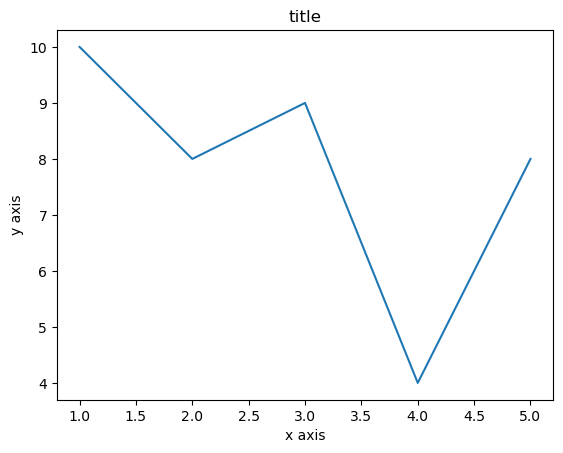

In [30]:
x = [1,2,3,4,5]
y=[10,8,9,4,8]

plt.plot(x,y)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('title')
plt.show

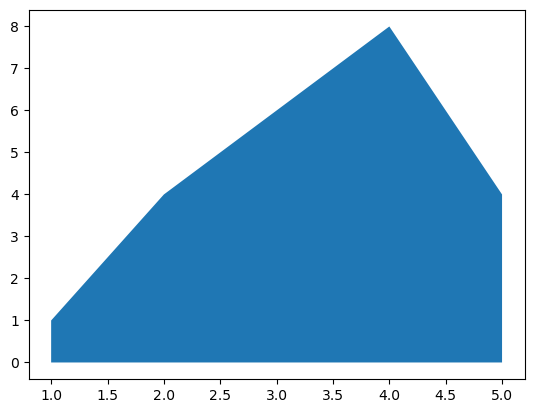

In [25]:
# Create data
x=range(1,6)
y=[1,4,6,8,4]

# Area plot
plt.fill_between(x, y)
plt.show()

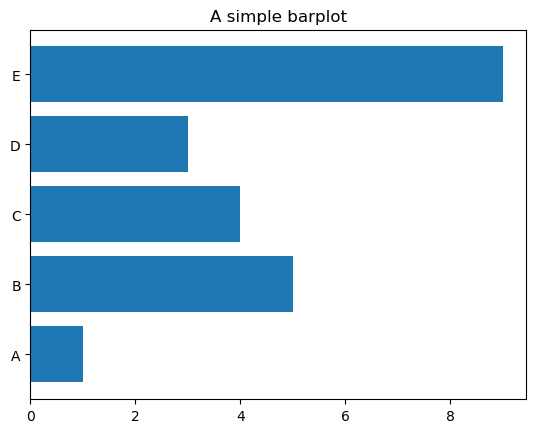

In [26]:

# Create a data frame
df = pd.DataFrame ({'Group':  ['A', 'B', 'C', 'D', 'E'], 'Value': [1,5,4,3,9]})

# Create horizontal bars
plt.barh(y=df.Group, width=df.Value);

# Add title
plt.title('A simple barplot');

Text(0.5, 0.98, 'Categorical Plotting')

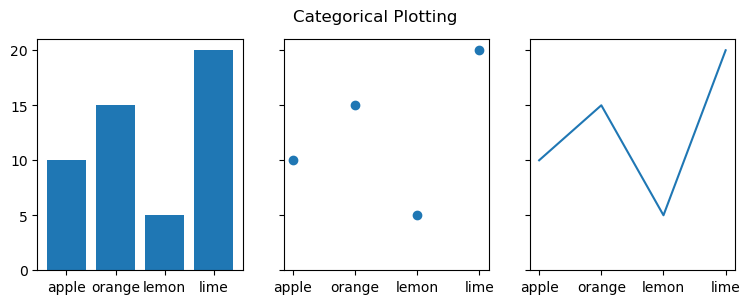

In [28]:
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [34]:
import numpy as np

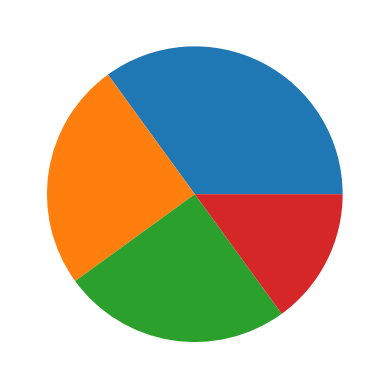

In [38]:
y = np.array([35, 25, 25, 15])
plt.pie(y)
plt.show() 